----
# Laboratorium 5 - Wpływ położenia biegunów na odpowiedź impulsową w układzie RLC II rzędu
----
Materiały dydaktyczne przeznaczone są wyłącznie dla studentów Wydziału Informatyki i Telekomunikacji Politechniki Poznańskiej 

----
# 0. Zagadnienia do opanowania przed zajęciami
----
- odpowiedź impulsowa 

- miejsca zerowe wielomianu

- bieguny transmitancji

- transformacja Laplace'a i odwrotna transformacja Laplace'a (metoda residuów) 

Funkcje z biblioteki *scipy.signal* potrzebne do zrealizowania ćwiczenia:  
`scipy.signal.freqresp`, `scipy.signal.signal.tf2ss`,  `scipy.signal.impulse`

Dokumentacja i opisy poszczególnych funkcji *scipy.signal*:  
https://docs.scipy.org/doc/scipy/reference/signal.html    



In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal
import sympy
poles_figsize  =(8, 8)
default_figsize=(14, 8)

----
# 1. Wyznaczanie transmitancji operatorowej układu RLC oraz wyznaczanie biegunów transmitancji
----
## 1.1 Zadanie: Wyznacz transmitancję operatorową dla następującego układu I rzędu:


Dla poniższej transmitancji układu RC I rzędu zastosowano bibliotekę Sympy wyznaczającą symbolicznie transmitancję operatorową. 



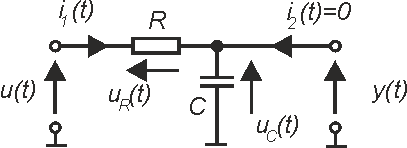
                         
                         
                         

In [15]:
#declare symbolic variable s (complex), R,L,C 
s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')
#Transmitancja - stosunek wejścia do wyjścia H(s) = Uc(s)/(Us(s)+Ur(s)) = (1/sc)/(R+1/sc)  = 1/(C*RS+1)

H1 = (1/(s*C)) / (R+(1/(s*C))) #dzielnik napięcia
display(sympy.simplify(H1))

1/(C*R*s + 1)

----
## 1.2 Dla wyznaczonego mianownika transmitancji wyznacz bieguny

W tym celu zdefiniuj wektor złożony ze współczynników przy każdej zmiennej s do stopnia danego wielomianu. Wykorzystaj funkcję `np.poly1d` oraz `np.roots`.
Uwaga, jeśli dla układu definiujemy transmitancję jako współczynniki licznika i mianownika (num, den), to współczynniki powinny być podane w kolejności malejącego wykładnika (np. s^2 + 3s + 5 byłyby reprezentowane jako [1, 3, 5]). W miejsce R i C podstaw wartości jednostkowe. 
Przedstaw położenie biegunów na płąszczyźnie zespolonej krzyżykami.


In [16]:
Licznik = np.poly1d([1])
Mianownik = np.poly1d([1, 1, 4]) #tworzą się dwa sprzężone zespolone bieguny
poles1 = np.roots(Mianownik)
print("bieguny = " + str(poles1))

bieguny = [-0.5+1.93649167j -0.5-1.93649167j]


/tmp/ipykernel_2888/3864662826.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


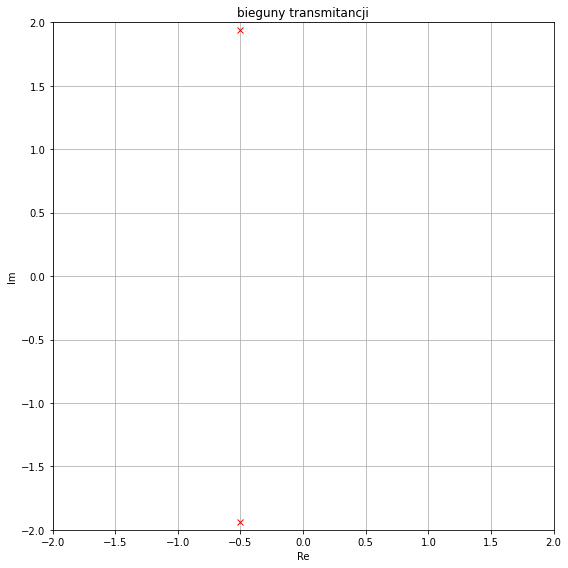

In [17]:
fig, ax = plt.subplots(1, 1, figsize=poles_figsize) #wykres subpolts(ilość_wierszy, ilość_kolumn, domyślna_figra)
ax.plot(poles1.real, poles1.imag,'rx') #rysujemy odpowiednio część real i inmaginary bieguna
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid()
fig.tight_layout()
fig.show()

----
## 1.3 Dla układu II rzędu przedstawionego poniżej wyznacz transmitancję operatorową i wyznacz położenie biegunów. 
Dokonaj uproszczenia z wykorzystaniem funkcji `sympy.cancel`. Zwróć uwagę na różnicę między zastosowaniem funkcji `sympy.symplify` a `sympy.cancel` 

<br>
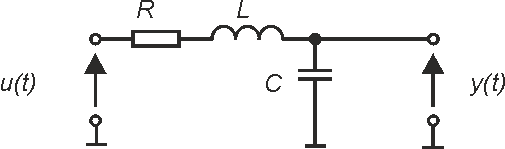



In [18]:
#declare symbolic variable s (complex), R,L,C
s = sympy.Symbol('s', real = 'False', nonzero = 'True')
R = sympy.Symbol('R', real = 'True' , nonzero = 'True')
C = sympy.Symbol('C', real = 'True' , nonzero = 'True')
L = sympy.Symbol('L', real = 'True' , nonzero = 'True')
#Policzona transmitancja
H2 = (1/(s*C))/(s*L + R + 1/(s*C)) #wzór matematyczny transmitancji z zmienną zespoloną s -> C=1/(s*C), L = s*L, R = R
display(sympy.simplify(H2))

1/(C*s*(L*s + R) + 1)

In [19]:
#Transmitancja 1/(CL*s^2 + CR*s + 1)
#defniumemy wartośći R L C
C=1
L=1
R=1
#Definiujemy licznik i mianownik transmitancji za pomocą zdefiniowanych R L C.
Licznik = np.poly1d([1])
Mianownik = np.poly1d([C*L, C*R, 1])
#calculate poles
bieguny = np.roots(Mianownik)
print("bieguny = " + str(bieguny))

#poles2 = 
#print("bieguny = " + str(poles2))


bieguny = [-0.5+0.8660254j -0.5-0.8660254j]


/tmp/ipykernel_2888/3587243489.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


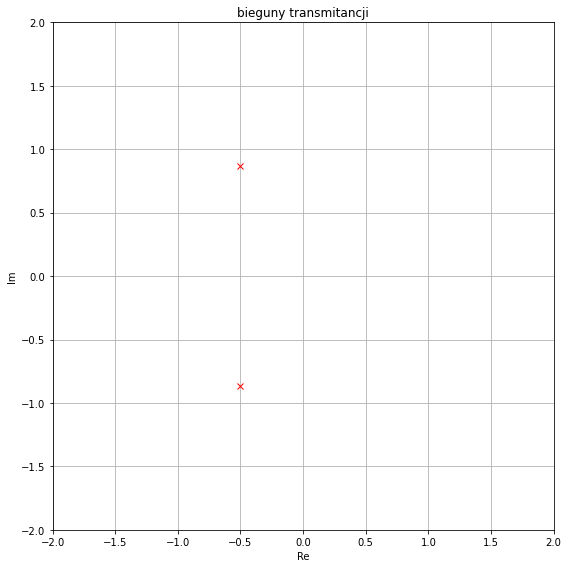

In [20]:
#plot poles
fig, ax = plt.subplots(1, 1, figsize=poles_figsize) #wykres subpolts(ilość_wierszy, ilość_kolumn, domyślna_figra)
ax.plot(bieguny.real, bieguny.imag,'rx') #odwołujemy się do konkres
ax.set_title("bieguny transmitancji")
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.grid()
fig.tight_layout()
fig.show()



---- 
## 2. Układ II rzędu - odpowiedź impulsowa i charakterystykę amplitudowo-fazowa
---- 
### Dla układu II rzędu przedstawionego na samym początku wyznacz odpowiedź impulsową oraz wykreśl charakterystykę amplitudowo-fazową tzw. wykres Nyguista.

Sprawdź na przykładzie odpowiedzi o charakterze drgań sinusoidalnych gasnących, jaki wpływ na częstotliwość charakterystyczną układu  $ \omega_0 = {1 \over \sqrt {LC} }  $ ma zmiana wartości pojemności? $ \xi $ ustaw na wartość bliską 0, ale nie zerową! 

Dla przypomnienia, transmitancja operatorowa układu II rzędu wyrażona za pomocą zmiennych opisujących zachowanie się odpowiedzi impulsowej

$$ H(s) = {\omega_0^2 \over s^2+2 \xi \omega_0 s + \omega_0^2}   $$

Na podstawie charakterystyki amplitudowo-fazowej określ charakter częstotliwościowy filtru (dolno-, górno- , pasmowo-przepustowy)?

In [5]:
def calculateImpulseResponseFromNumDen(B, A, TimeDomain): #definicja impulsu
    step = scipy.signal.impulse(scipy.signal.tf2ss(B, A), T=TimeDomain)[1]
    return step

Parameter ξ: 1.25
Parameter w0 - częstotliwość charakterystczna: 0.5


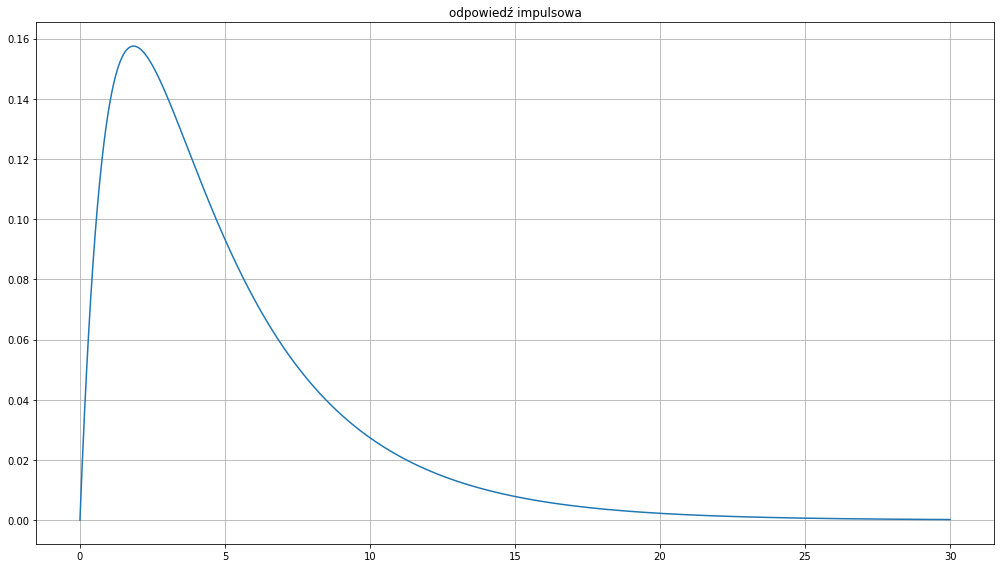

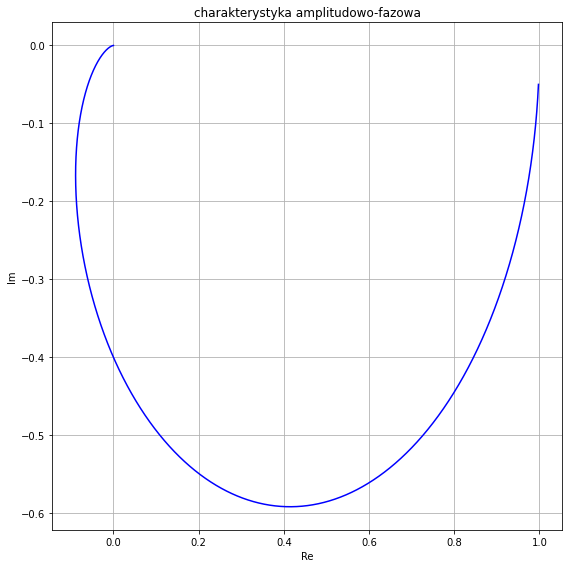

In [25]:
R=5
L=4
C=1
ξ=R*np.sqrt(C/L)/2 #trzeba przez 2 podzielć
print("Parameter ξ:", ξ)
#transmitancja
ω0 = (1/np.sqrt(L*C)) #definicja częsotliwości granicznej ω0 = sqrt(L/C)
print("Parameter w0 - częstotliwość charakterystczna:", ω0)
Licznik  = np.poly1d([ω0**2])
Mianownik  = np.poly1d([1, 2*ξ*ω0, ω0**2])

#odpowiedź impulsowa
time    = np.linspace(0, 30, 2000)
impulse = calculateImpulseResponseFromNumDen(Licznik, Mianownik, time)

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
axI.plot(time, impulse)
axI.set_title("odpowiedź impulsowa")
axI.grid()
figI.tight_layout()  
#figI.show()

#charakterystyka amplitudowo-fazowa
w = np.logspace(-2, 2, 10000)
s = w * 1j
H = Licznik(s) / Mianownik(s)

figAF, axAF = plt.subplots(1, 1, figsize=poles_figsize)
axAF.plot(H.real, H.imag, "b")
axAF.set_title("charakterystyka amplitudowo-fazowa")
axAF.set_xlabel("Re")
axAF.set_ylabel("Im") 
axAF.grid()
figAF.tight_layout()  
#figAF.show() #wysiwtlenie zdefiniowanego obrazka

---- 
## 3. Analiza zmiany charakteru odpowiedzi impulsowej oraz zmiany położenia biegunów w funkcji zmiany wartości współczynnika tłumienia 
---- 

Na jednym wykresie zebrać odpowiedzi impulsowe dla przypadków: 

$\begin{align}
& \text {a)  }  0 < \xi < 1 \text { - drgan sinusoidalnych gasnacych} \\
& \text {b)  }  \xi = 0 \text { - drgan sinusoidalnych (generator)} \\
& \text {c)  }  \xi = 1 \text { - przypadku aperiodyczo-krytycznego} \\
& \text {d)  }  \xi > 1 \text { - przypadku przetlumionego}
 \end{align}$

Do odpowiedniej wartości $ \xi $ dopasuj wartości elementów R, L i C. Zalężność na $ \xi $ jest następująca:

$$ 2 \xi = R \sqrt {C \over L} $$

Na drugim wykresie zbierz położenia biegunów dla tych samych przypadków a)-d). Na podstawie otrzymanych wyników wyciągnąć wnioski na temat wpływu położenia biegunów transmitancji układu na jego odpowiedź impulsową? Dla każdego z przypadków odpowiedz czy odpowiedź jest stabilna w sensie BIBO?


bieguny = [-1.   -0.25]
bieguny = [-0.5 -0.5]
bieguny = [-0.+0.35355339j  0.-0.35355339j]
bieguny = [-0.025+0.49937461j -0.025-0.49937461j]


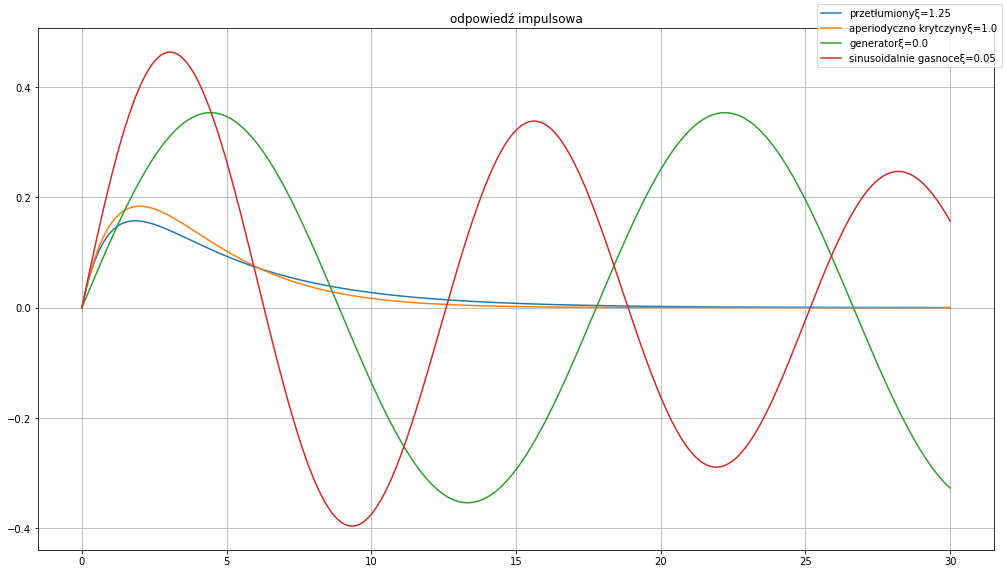

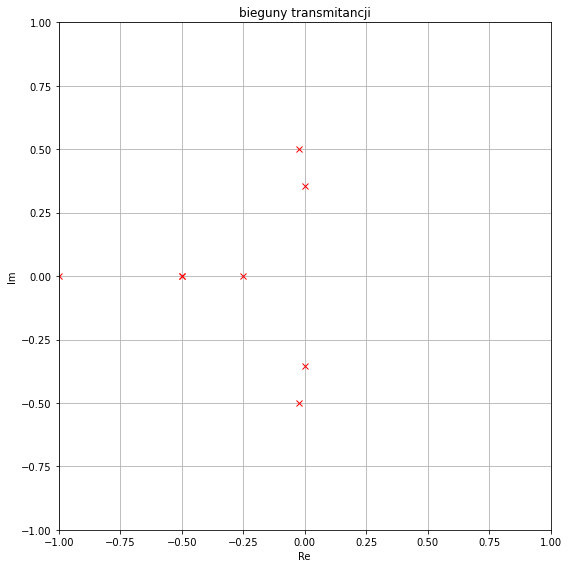

In [6]:
time = np.linspace(0, 30, 2000)  #próbki czasu 
L = 4
C = 1
ξ=0.2

Systems = { "przetłumiony"           : { "R" : 5  , "L" : 4, "C" : 1 },
            "aperiodyczno krytczyny" : { "R" : 2  , "L" : 2, "C" : 2 },
            "generator"              : { "R" : 0  , "L" : 4, "C" : 2 },
            "sinusoidalnie gasnoce"  : { "R" : 2*ξ*np.sqrt(C/L)  , "L" : 4, "C" : 1 }, #bierzemy ξ=0.2 i podtawiamy R = 2*ξ*np.sqrt(C/L) 
} #podanie parametrow do kolejnych wartosci R, L, C

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )


for Name, Params in Systems.items():
    R, L, C = Params["R"], Params["L"], Params["C"] #rozdzielenei parametrow
    ξ = (R*np.sqrt(C/L))/2
    Licznik = 1 #licznik transmitancji
    Mianownik = np.poly1d([C*L, C*R, 1]) #mianownik transmitancji

    impulse = impulse = calculateImpulseResponseFromNumDen(Licznik, Mianownik, time) #impuls w czasie
    poles  =  np.roots(Mianownik) #bieguny transmitancji
    print("bieguny = " + str(poles)) 
    #plot impulse on axI
    axI.plot(time, impulse, label=Name + "ξ={}".format(ξ)) #rysunek impulsu legenda -> label = Name(nazwa np. przytłumiony) + "ξ={}".format(ξ) 
    #plor poles on axP
    axP.plot(poles.real, poles.imag,'rx')

axI.set_title("odpowiedź impulsowa")
axI.grid()
figI.tight_layout() 
figI.legend()
#figI.show()

axP.set_title("bieguny transmitancji")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-1, 1])
axP.set_ylim([-1, 1])
axP.grid()
figP.tight_layout() 
#figP.legend()
#figP.show()

---- 
## 4. Analiza przypadku nierzeczywistego
---- 

Sprawdzić jak będzie wyglądała odpowiedź impulsowa dla ujemnej wartości rezystancji np. R=-1. Wartości L i C przyjąć jednostkowe. Czy odpowiedź impulsowa jest sumowalna? Czy układ jest stabilny BIBO? Wyjaśnić czym charakteryzuje się brak możliwości posumowania odpowiedzi impulsowej.

Parameter ξ: -0.5
Parameter w0 - częstotliwość charakterystczna: 1.0
bieguny = [0.5+0.8660254j 0.5-0.8660254j]


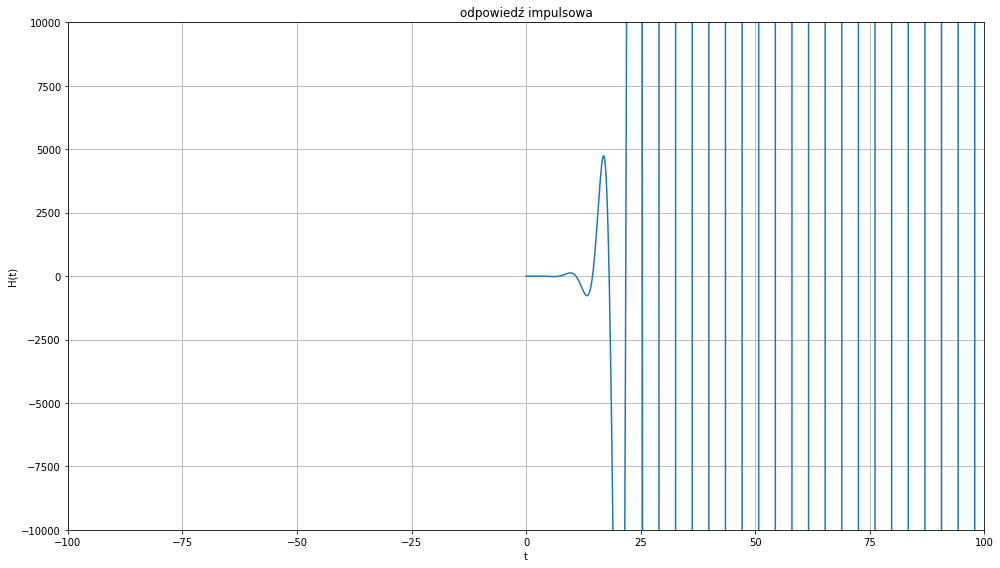

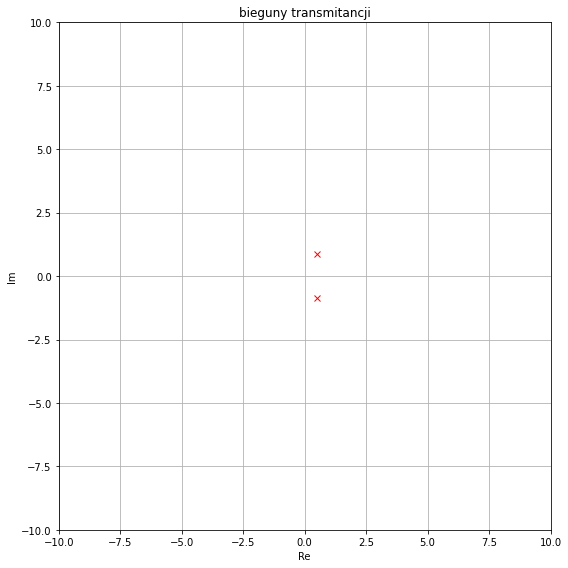

In [30]:
#ustawiamy parametry
R=-1
L=1
C=1
ξ=(R*np.sqrt(C/L))/2 #defincja ξ
print("Parameter ξ:", ξ)
#transmitancja
ω0 = (1/np.sqrt(L*C)) #definicja częsotliwości granicznej ω0 = sqrt(L/C)
print("Parameter w0 - częstotliwość charakterystczna:", ω0)
Licznik  = np.poly1d([ω0**2]) #licznik transmitancji
Mianownik  = np.poly1d([1, 2*ξ*ω0, ω0**2]) #mianownik transmitancji

#odpowiedź impulsowa
time    = np.linspace(0, 100, 2000)
impulse = calculateImpulseResponseFromNumDen(Licznik, Mianownik, time)

#Odpoiwedz rysujemy na figurze figI
figI, axI = plt.subplots(1, 1, figsize=default_figsize)
axI.plot(time, impulse)
axI.set_title("odpowiedź impulsowa")
axI.set_xlim([-100, 100])
axI.set_ylim([-10000, 10000]) #UWAGA JAK CHCESZ INNE CHARAKTERYSTKI (RECZYWISTE) TO TO ZMNIEJSZ
axI.set_xlabel("t")
axI.set_ylabel("H(t)") 
axI.grid()
figI.tight_layout()  


#Obliczneia  biegunów
w = np.logspace(-2, 2, 100000)
s = w * 1j #definicja zmiennej zespolonej s
H = Licznik(s) / Mianownik(s) #transmitancja w postaci operatorowej -> ze zmienną s
poles  =  np.roots(Mianownik) #bieguny transmitancji
print("bieguny = " + str(poles)) 


#plor poles on axP
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )
axP.plot(poles.real, poles.imag,'rx')
#wyswietlanie biegunów
axP.set_title("bieguny transmitancji")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-10, 10])
axP.set_ylim([-10, 10])
axP.grid()
figP.tight_layout() 


# WNIOSKI 

1)
Czy odpowiedź impulsowa jest sumowalna? 
Zauważamy, że odpowiedź impulsowa nie jest sumowalna i rozbiega się w nieskońćzoność, 
w przypadku pobudzenia naszym impulsem, generowana jest co raz bardziej rosrzerzająca się sinusoida.


2)
Czy układ jest BIBO stabilny? 
Układ nie jest BIBO stabilny, ponieważ  bieguny transmitancji znajdują się w prawej półpłaszczyźnie 
zespolonego układu współrzędnych co wynika z drugiego wykresu oraz obliczeń. Nie spełniając tym samym 
założenia, że bieguny układu stabilnego powinny być tylko w lewej otwartej półpłaszczyźnie (bez osi Im). 

3)
Oznacza to, że pobudzenie układu naszym impulsem który, musi mieć skończoną energię
spowdduje odpowiedź, która z teoretycznego puktu widzenia będzie generować nieskończoną energię
co jest fizycznie nie możliwe. 



---- 
## 5. Obejrzeć trójwymiarowy wykres transmitancji w funkcji zmiennej "s" dla przypadku drgań sinusoidalnych gasnących
---- 

Zmieniając wartość rezystora R, sprawdzić zmianę położenia biegunów oraz kształ transmitancji.



/tmp/ipykernel_2888/1400278133.py:14: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax  = fig.gca   (projection='3d')


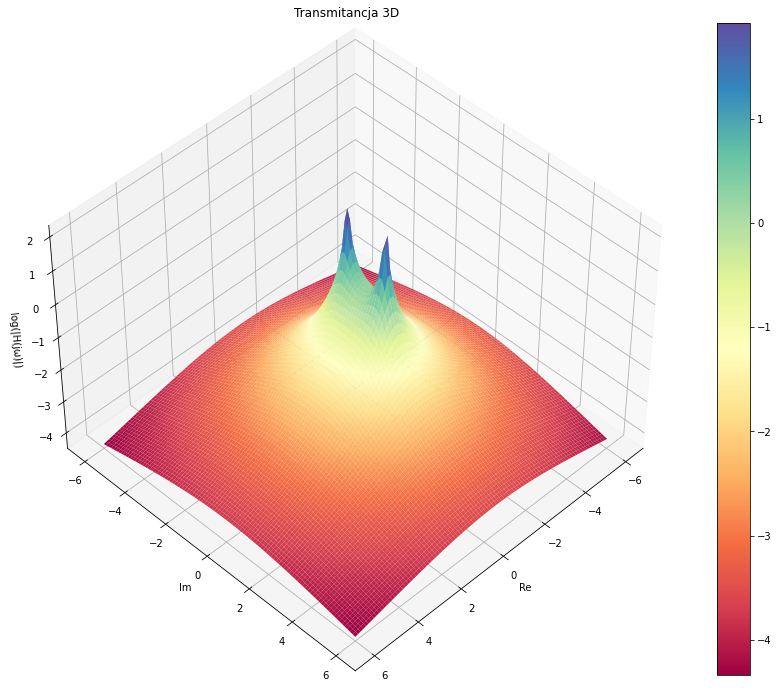

In [12]:
C, L, R = 1, 1, 1

B = np.poly1d([          1])
A = np.poly1d([C*L, C*R, 1])

Re     = np.linspace(-6, 6, 100)
Im     = np.linspace(-6, 6, 100)
RE, IM = np.meshgrid(Re, Im) #2D planes
s      = RE + IM*1j
H      = B(s)/A(s)
M      = np.abs(H)

fig = plt.figure(figsize=(16, 12))
ax  = fig.gca   (projection='3d')
srf = ax.plot_surface(RE, IM, np.log(M), cmap='Spectral', cstride=1, rstride=1)
ax.set_xlabel("Re")
ax.set_ylabel("Im")
ax.set_zlabel("log(|H(jω)|)")
ax.set_title('Transmitancja 3D')
ax.view_init(45, 45)
fig.colorbar(srf) # add a color bar which maps values to colors
#fig.show()

# Czwarte z zerami transmitancji

Parameter ξ: -0.5
Parameter w0 - częstotliwość charakterystczna: 1.0


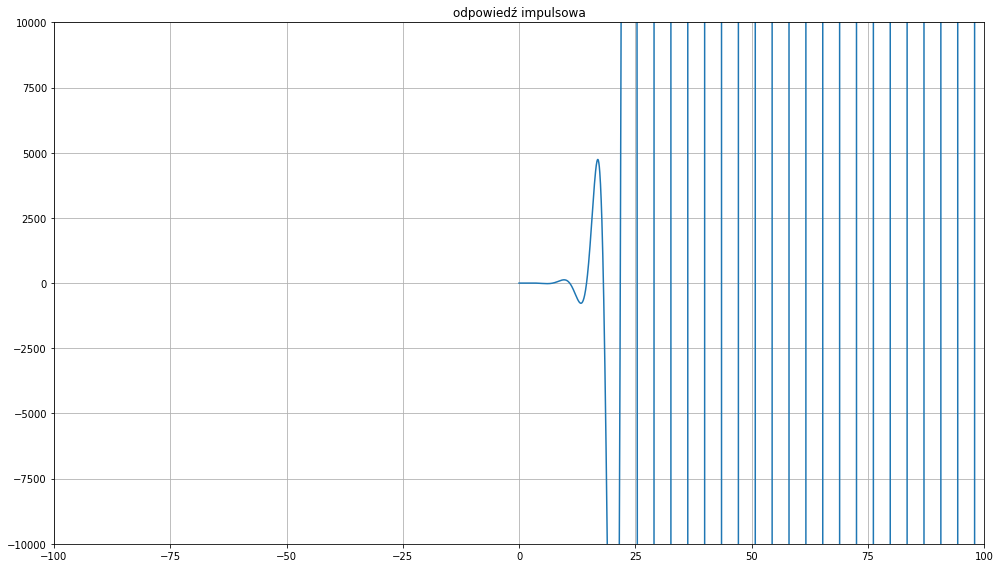

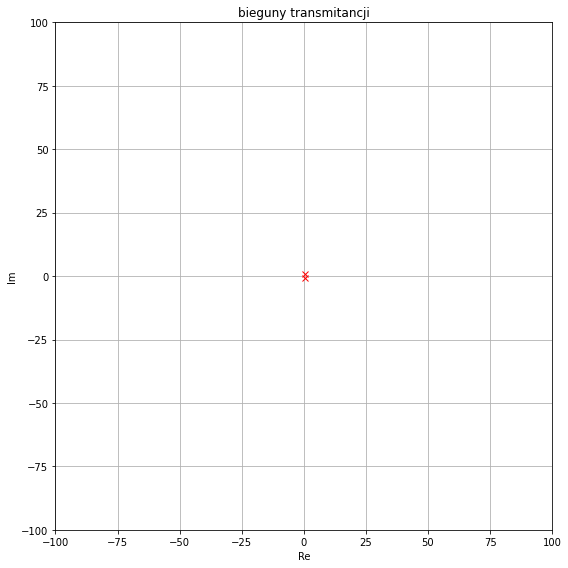

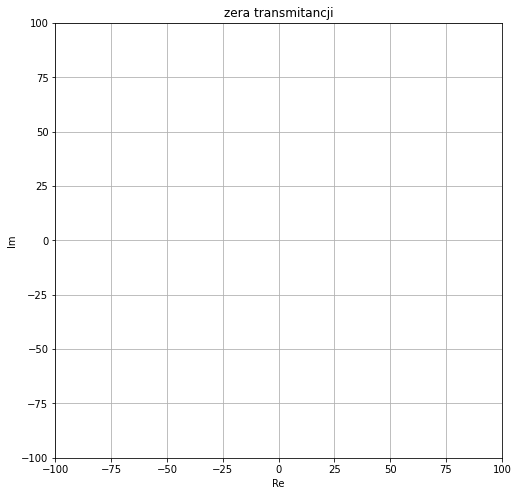

In [44]:
R=-1
L=1
C=1
ξ=R*np.sqrt(C/L)/2 #trzeba przez 2 podzielć
print("Parameter ξ:", ξ)
#transmitancja
ω0 = (1/np.sqrt(L*C)) #definicja częsotliwości granicznej ω0 = sqrt(L/C)
print("Parameter w0 - częstotliwość charakterystczna:", ω0)
Licznik  = np.poly1d([ω0**2])
Mianownik  = np.poly1d([1, 2*ξ*ω0, ω0**2])

#odpowiedź impulsowa
time    = np.linspace(0, 100, 2000)
impulse = calculateImpulseResponseFromNumDen(Licznik, Mianownik, time)

figI, axI = plt.subplots(1, 1, figsize=default_figsize)
axI.plot(time, impulse)
axI.set_title("odpowiedź impulsowa")
axI.set_xlim([-100, 100])
axI.set_ylim([-10000, 10000]) #UWAGA JAK CHCESZ INNE CHARAKTERYSTKI (RECZYWISTE) TO TO ZMNIEJSZ
axI.grid()
figI.tight_layout()  
#figI.show()

#Obliczneia bieguny i zera -> bieguny (pierwiastki mianownika, zera licznika)
w = np.logspace(-2,2,1000)
s = 1j * w
H = Licznik(s)/Mianownik(s)
bieguny = np.roots(Mianownik)
zera = np.roots(Licznik)

#wyswietlanie biegunów
figP, axP = plt.subplots(1, 1, figsize=poles_figsize  )
axP.plot(bieguny.real, bieguny.imag,'rx')
axP.set_title("bieguny transmitancji")
axP.set_xlabel("Re")
axP.set_ylabel("Im") 
axP.set_xlim([-100, 100])
axP.set_ylim([-100, 100])
axP.grid()
figP.tight_layout()
#wyswietlanie zer
figY, axY = plt.subplots(1, 1, figsize=poles_figsize  )
axY.plot(zera.real, zera.imag,'rx')
axY.set_title("zera transmitancji")
axY.set_xlabel("Re")
axY.set_ylabel("Im") 
axY.set_xlim([-100, 100])
axY.set_ylim([-100, 100])
axY.grid()
figP.tight_layout() 

